<a href="https://colab.research.google.com/github/chandrashekarswamy/EVA-Phase-01/blob/master/Assignment%2009/%20Assignment%2009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


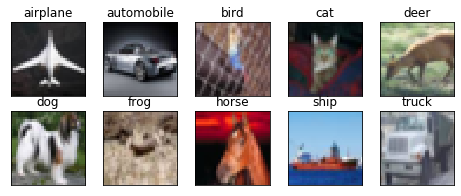

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()

model.add(Convolution2D(16, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #32 : 3*3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(32, 3, 3, border_mode='same'))							#32 : 5*5
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, border_mode='same')) 							#32 : 7*7
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Convolution2D(128, 3, 3, border_mode='same'))							#32 : 9*9
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(256, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))									          #16 

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, border_mode='same'))							#16 : 11*11
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, border_mode='same'))							#16  : 13*13 
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Convolution2D(128, 3, 3, border_mode='same'))							#16	: 15*15
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(Convolution2D(256, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))	                          #8 

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, border_mode='same'))							#8	: 17*17
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, border_mode='same'))							#8	: 19*19
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Convolution2D(128, 3, 3))							                    #6	: 21*21
model.add(Activation('relu'))
model.add(Dropout(0.15))

model.add(BatchNormalization())
model.add(Convolution2D(10, 6))                                     #1  : 26*26

model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/l

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':




Epoch 1/50
390/390 [==============================] - 45s 114ms/step - loss: 1.7558 - acc: 0.4081 - val_loss: 2.5000 - val_acc: 0.3350
Epoch 2/50
390/390 [==============================] - 35s 91ms/step - loss: 1.2600 - acc: 0.5651 - val_loss: 1.8382 - val_acc: 0.4421
Epoch 3/50
390/390 [==============================] - 35s 90ms/step - loss: 1.0202 - acc: 0.6473 - val_loss: 1.3173 - val_acc: 0.5646
Epoch 4/50
390/390 [==============================] - 35s 91ms/step - loss: 0.8542 - acc: 0.6994 - val_loss: 1.0075 - val_acc: 0.6603
Epoch 5/50
390/390 [==============================] - 35s 90ms/step - loss: 0.7534 - acc: 0.7368 - val_loss: 1.0052 - val_acc: 0.6608
Epoch 6/50
390/390 [==============================] - 35s 90ms/step - loss: 0.6812 - acc: 0.7610 - val_loss: 0.9198 - val_acc: 0.6907
Epoch 7/50
390/390 [==============================] - 35s 90ms/step - loss: 0.6239 - acc: 0.7821 - val_loss: 0.7218 - val_acc: 0.7497
Epoch 8/50
390/390 [==============================] - 35s 9

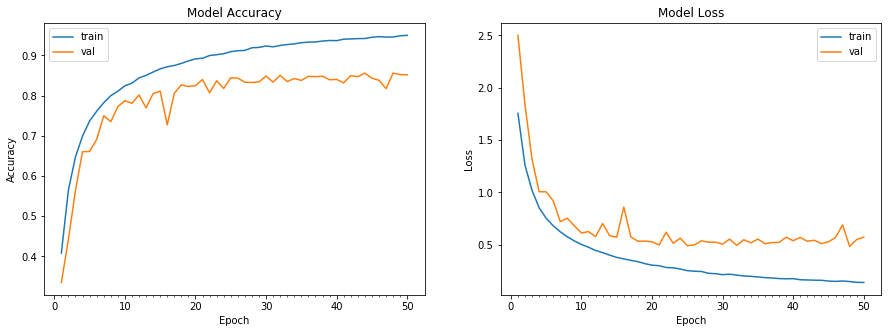

Accuracy on test data is: 85.17


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Cutout implimentation
def get_random_eraser(p=0.7, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=10, v_h=210, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [12]:
!ls 'gdrive/My Drive/EVA/Assignment 09.h5'

'gdrive/My Drive/EVA/Assignment 09.h5'


In [0]:
from keras.preprocessing.image import ImageDataGenerator
import keras
datagen = ImageDataGenerator(zoom_range=0.0,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1),
                             horizontal_flip= False, featurewise_center = True,
                             featurewise_std_normalization = True)

from keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

callback = keras.callbacks.ModelCheckpoint('gdrive/My Drive/EVA/Assignment 09.h5', monitor = "val_acc", save_best_only = True, mode ="auto", verbose = 1)

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
  1/195 [..............................] - ETA: 36s - loss: 0.1666 - acc: 0.9570

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=195, epochs=100)`
  """
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  

195/195 [==============================] - 33s 171ms/step - loss: 0.3957 - acc: 0.8616 - val_loss: 0.5173 - val_acc: 0.8417

Epoch 00001: val_acc did not improve from 0.88920
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
195/195 [==============================] - 33s 171ms/step - loss: 0.3398 - acc: 0.8794 - val_loss: 0.4779 - val_acc: 0.8487

Epoch 00002: val_acc did not improve from 0.88920
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
195/195 [==============================] - 33s 171ms/step - loss: 0.2977 - acc: 0.8949 - val_loss: 0.4691 - val_acc: 0.8563

Epoch 00003: val_acc did not improve from 0.88920
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
195/195 [==============================] - 33s 171ms/step - loss: 0.2755 - acc: 0.9004 - val_loss: 0.4282 - val_acc: 0.8655

Epoch 00004: val_acc did not improve from 0.88920
Epoch 5/100

Epoch 00005: LearningRateS

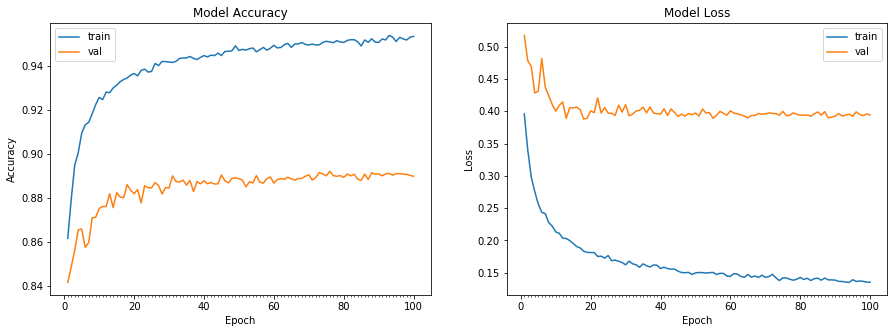

Accuracy on test data is: 88.98


In [20]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[LearningRateScheduler(scheduler, verbose=1), callback])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

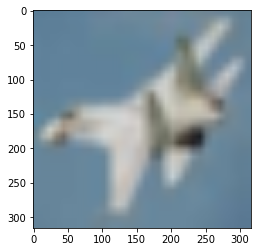

In [21]:
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

plt.imshow(cv2.resize(test_features[10], (316,316)))

In [0]:
from keras.models import load_model
model = load_model('gdrive/My Drive/EVA/Assignment 09.h5')

In [0]:
test_set = [4, 8, 10, 16]

In [0]:
# Grad CAM implimentation

def heat(i):
  img_path = test_features[i]
  x1 = image.img_to_array(img_path)
  x = np.expand_dims(x1, axis=0)
  
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("conv2d_9")
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for j in range(128):
      conv_layer_output_value[:, :, j] *= pooled_grads_value[j]
  
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  img = test_features[i]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype=cv2.CV_32F)
  
  return superimposed_img

In [0]:
super_imposed=[]

for i in test_set:
  super_imposed.append(heat(i))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


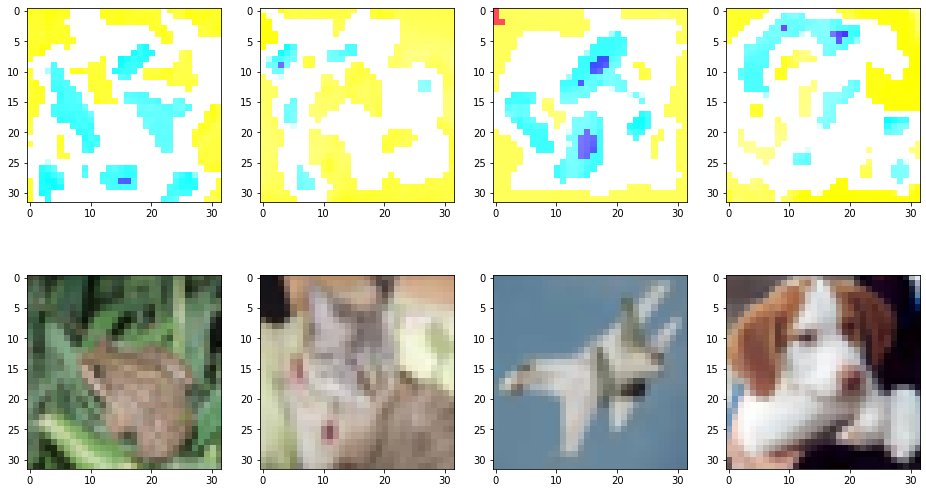

In [26]:
#for i in range(4):
fig, axs = plt.subplots(2, 4, figsize=(16,9))

axs[0, 0].imshow(super_imposed[0])
axs[0, 1].imshow(super_imposed[1])
axs[0, 2].imshow(super_imposed[2])
axs[0, 3].imshow(super_imposed[3])

axs[1, 0].imshow(test_features[4])
axs[1, 1].imshow(test_features[8])
axs[1, 2].imshow(test_features[10])
axs[1, 3].imshow(test_features[16])